In [52]:
'''

Password - 1000k unique values for password collected online

Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..
Strength of the password based on rules(such as containing digits, special symbols , etc.)


The passwords used in our analysis are from 000webhost leak that is available online

'''

'\n\nPassword - 1000k unique values for password collected online\n\nStrength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..\nStrength of the password based on rules(such as containing digits, special symbols , etc.)\n\n\nThe passwords used in our analysis are from 000webhost leak that is available online\n\n'

In [232]:
## importing all necessary libraries ..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import string
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [166]:
## u have your data into 'password_Data.sqlite' which has table has 'Users'
## now u can read data from this db file 'password_Data.sqlite' using sqlite3 & pandas

In [167]:
# from google.colab import drive
# drive.mount('/content/drive')

In [233]:
# very first u have to create a SQL connection to our SQLite database
con = sqlite3.connect(r"/content/drive/MyDrive/Hands on Python/Data Science Projects/Password Strength Prediction/password_data.sqlite")
#### check online its table name on https://sqliteonline.com/
data = pd.read_sql_query("SELECT * FROM Users" , con)

data.drop(["index"] , axis=1 , inplace=True)
data.isnull().any()

data[data["password"].str.isnumeric()].shape  ### only 26 people have set their password as only number !

data[data["password"].str.isalpha()].shape ### around 50 users have their password as alphabet letters only !

data[data["password"].str.isalnum()] ### most of the users around 97K have their password as alpha-numeric..

data[data["password"].str.istitle()] ### around 932 users have their password having first alphabet capital !


string.punctuation ## all punctuations defined in "string" package !

def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

data["password"].apply(find_semantics)==1
data[data["password"].apply(find_semantics)==1]

## ie , 2663 observations have special characters in between them ..
## 2.6% people password actually uses special character in their password ..

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [169]:
'''

we have password strength so you can do a quick google search to check what features password depends on:-
It depends on 5 factors :

    Length of password
    Frequency of Lowercase Characters
    Frequency of Uppercase Characters
    Frequency of Numeric Characters
    Frequency of Special Characters

These will be the result of the google search to find factors effecting strength of password..


'''

'\n\nwe have password strength so you can do a quick google search to check what features password depends on:-\nIt depends on 5 factors :\n\n    Length of password\n    Frequency of Lowercase Characters\n    Frequency of Uppercase Characters\n    Frequency of Numeric Characters\n    Frequency of Special Characters\n\nThese will be the result of the google search to find factors effecting strength of password..\n\n\n'

In [170]:
'''

Q..->> why we are diving each value by its Total length or why we are normalizing frequency ?

Ans : Just  to get rid of some outliers bcz some passwords have huge length as we have seen , hence value of lowercase could
also be high , so lets normalise it in the range between 0 to 1


'''

'\n\nQ..->> why we are diving each value by its Total length or why we are normalizing frequency ? \n\nAns : Just  to get rid of some outliers bcz some passwords have huge length as we have seen , hence value of lowercase could \nalso be high , so lets normalise it in the range between 0 to 1\n\n\n'

In [234]:
data["length"] = data["password"].str.len()
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3) ## applying "freq_special_case" function
data["special_char_freq"] = data["special_char_freq"]/data["length"] ## noromalising "special_char_freq" feature



In [235]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.0
2,soporte13,1,9,0.778,0.0,0.222,0.0


In [236]:
data[['length' , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]).reset_index()
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [174]:
'''

Just taking a rough look at the above stats I can say the following:-



->> Higher the length, Higher the strength

->> In case on alphabet frequency higher is not better.
    Probably because it'll not be a strong password if max portion is occupied by just alphabets..
    Password has more strength if the char types are spread in decent proportions.



'''

"\n\nJust taking a rough look at the above stats I can say the following:-\n\n\n\n->> Higher the length, Higher the strength\n\n->> In case on alphabet frequency higher is not better. \n    Probably because it'll not be a strong password if max portion is occupied by just alphabets..\n    Password has more strength if the char types are spread in decent proportions.\n\n\n\n"

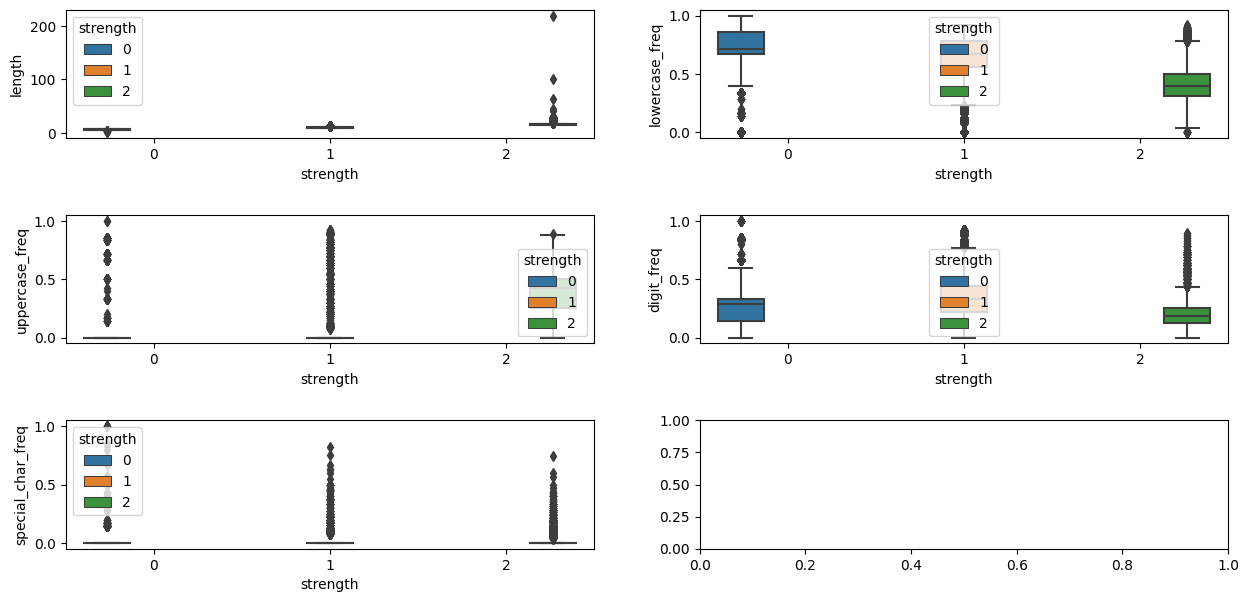

In [237]:

fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

In [176]:
'''
Insights :
Regarding the insights we can say that:-



->> Higher Lowercase frequency is seen in low strength passwords.
    For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.


->> In digit_freq there is a split of majority poplutation of strength 1 and 2
    but for 0 and 1 strength , there is overlap so no too much to say there.
    But we can say a nicely propotioned password is good..


->> In upper_freq , there is a trend if freq is around 0.5 then password is strong

->> Similar but stronger same trend as above in special_freq.

->> Higher strength passwords have more type breaks.


'''

'\nInsights :\nRegarding the insights we can say that:-\n\n\n\n->> Higher Lowercase frequency is seen in low strength passwords. \n    For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.\n\n\n->> In digit_freq there is a split of majority poplutation of strength 1 and 2 \n    but for 0 and 1 strength , there is overlap so no too much to say there. \n    But we can say a nicely propotioned password is good..\n    \n    \n->> In upper_freq , there is a trend if freq is around 0.5 then password is strong    \n    \n->> Similar but stronger same trend as above in special_freq.\n\n->> Higher strength passwords have more type breaks.\n\n\n'

In [238]:
#TF and IDF
#TF - Term Freq
#IDF - Inverse Document Frequency
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel
x = list(dataframe["password"])

from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data

#### as password is a series of chars , we have to calculate TF_IDF values of each char
#### Thats why we have to split our password as-->>
#### kzde5577-->> ['k', 'z', 'd', 'e', '5', '5', '7', '7']


### then we can compute Tf-Idf value of each character like Tf-IDF value of k , Tf-IDF value of z

vectorizer = TfidfVectorizer(analyzer="char")
X = vectorizer.fit_transform(x)


X.shape


## ie (100000,1) passwords gets represented using (100000, 99)
## ie each password gets represented using 99 dimensions ..

## note : in your case , this dimension might be changed !

### returns feature/char_of_passwords/columns names

vectorizer.get_feature_names_out()

## ie these are the various chars to which different TF-IDF values are assigned for 100000 passwords ..
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']
y = dataframe["strength"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

from sklearn.linear_model import LogisticRegression
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes

clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test) ## doing prediction on X-Test data
y_pred
from collections import Counter

Counter(y_pred)

Counter({1: 16799, 2: 1722, 0: 1479})

In [98]:
### as Logistic reg. model'clf' was trained on 101 features [99 from TF-IDF + 2 features from (total_length+lower_case_freq)]
## hence we need to convert any input(password) into (1,101) so that my model will accept this as Input ..

In [249]:
password = "jdsddvio&^bhs"
sample_array = np.array([password])
sample_matrix = vectorizer.transform(sample_array)
sample_matrix.toarray()
sample_matrix.toarray().shape

### right now , array dim. is (1,99) so now we need to make it as : (1,101) so that my model will accept it as input..
### ie we need to add (length_of_password) & (total_lowercase_chars) in passsword

password
len(password)


13

In [250]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)
clf.predict(new_matrix)

array([0])

In [240]:
### lets Automate it (lets design a function)

In [244]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)

    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)

    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [246]:
predict()

Enter a password : 12errr


'Password is weak'

In [ ]:
#### check Accuracy of your model using confusion_matrix, accuracy_score

from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report
accuracy_score(y_test , y_pred)
confusion_matrix(y_test , y_pred)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.52      0.29      0.37      2752
           1       0.82      0.94      0.88     14780
           2       0.83      0.53      0.65      2468

    accuracy                           0.80     20000
   macro avg       0.73      0.59      0.63     20000
weighted avg       0.78      0.80      0.78     20000

